In [56]:
import numpy as np
from math import exp
import random
import matplotlib.pyplot as plt
from itertools import permutations
import scipy.optimize as optimize
import functools

$$p(y|x) = \exp{(h(x,y) + K(y) - K(x) - \delta(y))}

In [101]:
def h(theta,x,y):
    return theta*x*y

def permute(X):
    ''' X : list '''
    l = X[1:-1]
    permuted = [X[0]] + random.sample(l, len(l)) + [X[-1]]
    return permuted

def permutation_distribution(theta,X):
    n = len(X)
    l = X[1:-1]
    f = [] #note: non normalized distribution
    for i in permutations(l,len(l)):
        X_pi = [X[0]] + list(i) + [X[-1]] #先頭が恒等写像
        kernel = sum([h(theta,X_pi[t-1-1],X_pi[t-1]) for t in range(2,n+1)]) - 50
        
        f.append(exp(kernel))
    return f


def conditional_likelihood(theta,X):
    f = permutation_distribution(theta,X)
    return f[0]/sum(f)

def negative_conditional_likelihood(theta,X):
    return -conditional_likelihood(theta,X)

def CLE(X):
    f = functools.partial(negative_conditional_likelihood, X=X)
    # res = optimize.minimize_scalar(f, bounds=(-10, 10), method="bounded")
    res = optimize.minimize_scalar(f, method="brent", tol=1e-5,options={'maxiter':100})
    return res

In [102]:
# AR(1)過程のデータ作成
phi1 = 0.5 # |phi1| < 1が定常性条件
c = 0 #c + phi * mu = mu, mu = c/(1-mu)
sigma = 0.5 #分散0.25
T = 500
mu = c / (1 - phi1)

ar_data = np.zeros(T)
ar_data[0] = mu + np.random.normal(0, sigma)
for t in range(1, T):
    ar_data[t] = c + phi1 * ar_data[t-1] + np.random.normal(0, sigma)

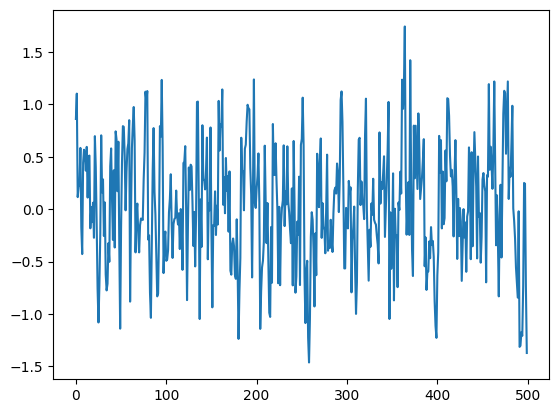

In [103]:
ar_data = list(ar_data)
plt.plot(ar_data)

たぶん$\phi_1 = \sigma^2 \theta$

In [104]:
opt = CLE(ar_data)
theta_hat = opt.x
phi_hat = (sigma**2)*theta_hat
print(f"推定値:{phi_hat}, 実際の値:{phi1}")


KeyboardInterrupt: 